# AUTOMOBILES

### What is it?

+ **It is mini project related to the Automobile dataset to predict the price of a vehicle on the basis of its feature.**
+ **Here I have tried to cover as many slides as I can.**

### Why This?

+ **Being an automobile fanatic, and as I am learning data analysis, so it would be great to analyse this data.**

### What to expect?

+ **This notebook presents the multivariate analysis of the automobile dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
df  =  pd.read_csv("Automobile_data.csv")

In [4]:
temp = df.copy()

In [5]:
temp.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [13]:
temp.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [7]:
temp = temp.replace("?",np.nan)

***
**Converting ? to the null values so that we can change them for further analyzing**
***

In [8]:
temp.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

***
**From above we can see the number of null values in each column**
***

In [9]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
temp = temp.astype({'normalized-losses': 'float64',"bore":"float64","stroke":"float64","price":"float64"})

In [11]:
temp = temp.astype({"horsepower":"float64","peak-rpm":"float64"})

***
**We have changed the data types of multiple columns for the analysis**
***

In [52]:
temp["bore"]=temp["bore"].fillna(temp["bore"].mean())

In [53]:
temp["stroke"]=temp["stroke"].fillna(temp["stroke"].mean())

In [54]:
temp["horsepower"]=temp["horsepower"].fillna(temp["horsepower"].mean())

In [56]:
temp["peak-rpm"]=temp["peak-rpm"].fillna(temp["peak-rpm"].mean())

In [57]:
temp["price"]=temp["price"].fillna(temp["price"].mean())

***
**Now we have filled the null values of each column with the mean of the particular column.**
***

In [58]:
temp.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [61]:
temp.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.033577,0.066315,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.033577,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.066315,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


In [64]:
temp.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [126]:
names = []
for i in temp['make']:
    i.split(",")
    names.append(i)
        

In [128]:
words = " ".join((names))

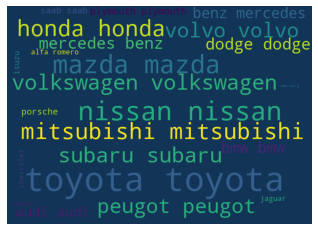

In [130]:
wordcloud = WordCloud(background_color="#123456", width=700, height=500).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##  Univariate Analysis 

### 1. Brands and the number of cars under those?

Text(0.5, 1.0, 'Cars type and their frequencies')

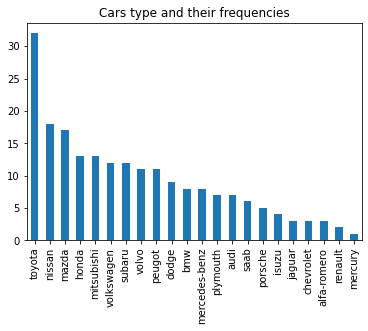

In [69]:
temp["make"].value_counts().plot(kind="bar")
plt.title("Cars type and their frequencies")

***
**As We can see toyota has the maximum number of cars followed by  nissan**

***

### 2. Find the counts of the cars on the basis of fuel?

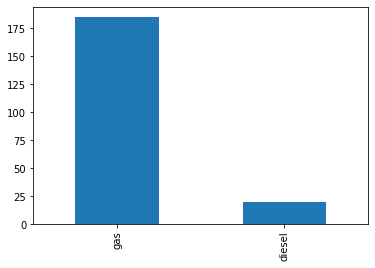

In [70]:
temp["fuel-type"].value_counts().plot(kind="bar")

***
**As we can see mostly cars runs on gas as compared to diesel, it moght be because of the rules made the governments of diffrent country in respect to the environment as diesel cars emit harmful gases which are dangerous for the environment**

***`

### 3. Count on the basis if aspiration?

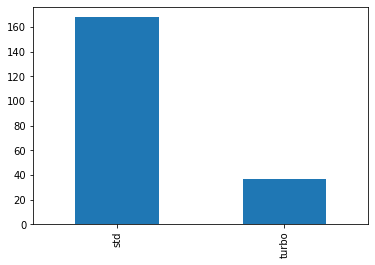

In [71]:
temp["aspiration"].value_counts().plot(kind="bar")

***
**Through this we have seen that mostly cars have standard aspiration Internal combustion engines as compared to turbo engines***

***

### 4. Count on the basis of number of doors?

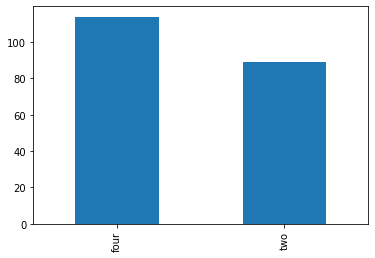

In [72]:
temp["num-of-doors"].value_counts().plot(kind="bar")

***
**As we can see the cars with four doors are use more as compared to two doors.**

***

### 5. Count on the basis of body type?

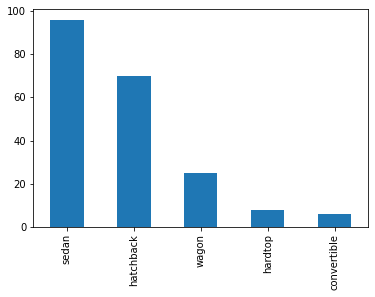

In [86]:
temp["body-style"].value_counts().plot(kind="bar")


***

**People mostly prefer sedan and hatchback as compared to other cars**
***

### 6. Count on the basis of drive wheels?

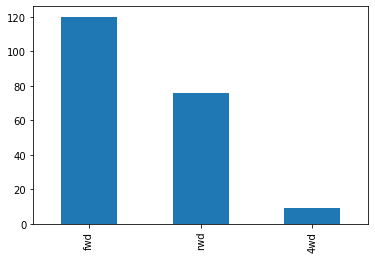

In [85]:
temp["drive-wheels"].value_counts().plot(kind="bar")

***
**As we can mostly cars used to be forward wheel drive as compared to rear of four wheel drive**
***

### 7. Count on the basis of engine location?

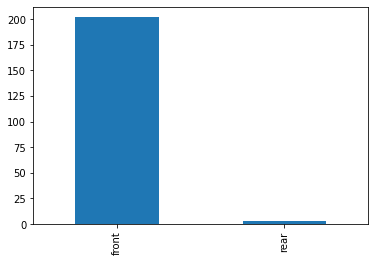

In [84]:
temp["engine-location"].value_counts().plot(kind="bar")

***
**As we can most of the automobiles have engine in front**
***

### 8. Counts on the basis of engine type?

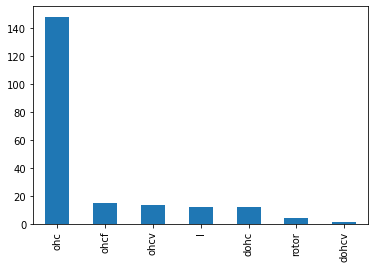

In [83]:
temp["engine-type"].value_counts().plot(kind="bar")

### 9. Count on the basis of num-of -cylinders?

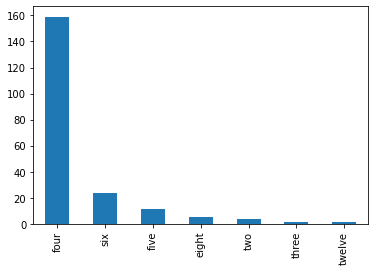

In [82]:
temp["num-of-cylinders"].value_counts().plot(kind="bar")

***
**As we can see mostly cars have four cylinder engine as compared to others**
***

### 10. Counts on the basis of fuel_system?

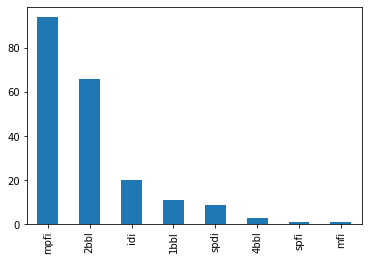

In [81]:
temp["fuel-system"].value_counts().plot(kind="bar")

***
**As we can see mostly cars have mpfi fuel system**
***

### 11. Which car has the maximum price

In [80]:
temp[temp["price"] == temp["price"].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0


***
**As we can see mercedes benz has the maximum price**
***

### 12. which car has the minimum price

In [88]:
temp[temp['price']==temp['price'].min()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
138,2,83.0,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69.0,4900.0,31,36,5118.0


### 13. To find  the correlation between 'engine-size' and 'price'

(0.0, 52347.27627505432)

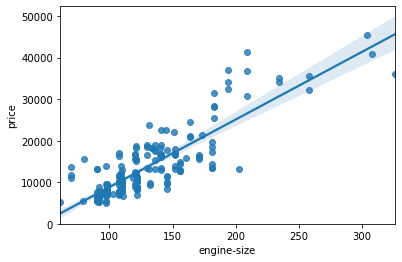

In [89]:
f= temp[["engine-size", "price"]].corr()
sns.regplot(x="engine-size", y="price", data=temp)
plt.ylim(0,)

***
**As we can see the price increases with increase in engine size so it is a  positive correlational.Engine size seems like a pretty good to compare with  price since the line is almost a perfect diagonal line**
***

### 14. To find the correlation between 'highway-mpg' and 'price' 

(0.0, 48130.624038083544)

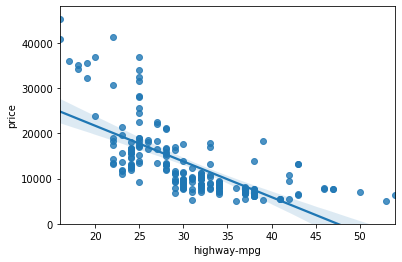

In [90]:
temp[['highway-mpg', 'price']].corr()
sns.regplot(x="highway-mpg", y="price", data=temp)
plt.ylim(0,)

***
**As the highway-mpg goes up, the price goes down. This indicates an negative corelation between these two variables.**

***

###  15. To find the correlation between 'peak-rpm' and 'price' 

(0.0, 47414.1)

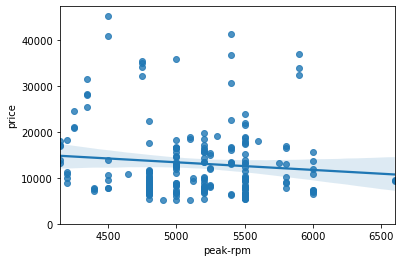

In [91]:
temp[['peak-rpm','price']].corr()
sns.regplot(x="peak-rpm", y="price", data=temp)
plt.ylim(0,)

***

**Peak rpm does not seem like a good comparison with the price at all since the line is close to horizontal. Also, the data points are very scattered and far from the line, showing lots of variability. Therefore we can't rely on peak rpm.**

***

### 16. Calculate the mean price on the basis if drive wheels?

In [92]:
temp.groupby("drive-wheels")["price"].mean()

drive-wheels
4wd    10570.569928
fwd     9310.818823
rwd    19671.422755
Name: price, dtype: float64

***
**Through this we found out that average price of front wheel drive comes out to be less than the other two**

***

### 17: Calculate the mean price on the basis of drive wheels and body styles

In [94]:
temp.groupby(["drive-wheels","body-style"]).agg({"price":np.mean})

price
drive-wheels body-style               
4wd          hatchback    10405.064677
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9930.934363
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14278.269966
             sedan        21711.833333
             wagon        16994.222222

***
**Through this we found that mean price of the cars on the basis of drive-wheels and body-style.**
***

### 18.Average Price on the basis of features of engine

In [96]:
temp[["engine-location","engine-type","num-of-cylinders","price"]].groupby(["engine-location","engine-type","num-of-cylinders"]).mean()

price
engine-location engine-type num-of-cylinders              
front           dohc        four              14266.833333
                            six               21966.000000
                dohcv       eight             13207.129353
                l           four              15489.090909
                            three              5151.000000
                ohc         five              21207.557214
                            four               9888.771221
                            six               28295.000000
                ohcf        four               8541.250000
                ohcv        eight             38900.000000
                            six               16834.875000
                            twelve            36000.000000
                rotor       two               13020.000000
rear            ohcf        six               34528.000000

***
+ **Through this we have seen that the average price was maximum when engine was loacted in the front and type was ohcv and there were 8 number of cylinders.**

+ **We can even see through this that there is only one type of car which have rear engine which ahs 6 num of cylinders and engine type is ohcf**
***

### 19. Find the cars with the maximum curb weight and there price?

In [135]:
temp[temp["curb-weight"] == temp["curb-weight"].max()].loc[[47,48],["make","curb-weight","price"]]

,make,curb-weight,price
47,jaguar,4066,32250.0
48,jaguar,4066,35550.0


***
**From this we found out that the two of the jaguar cars have the maximum weight** 
***

### 20. Find the correlation between the horsepower and price


(0.0, 50794.88097870049)

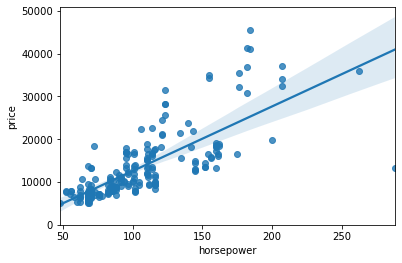

In [101]:
f= temp[["horsepower", "price"]].corr()
sns.regplot(x="horsepower", y="price", data=temp)
plt.ylim(0,)

***
**As we can see the price increases with increase in engine size so it is a  positive correlational. Horsepower seems like a pretty good to compare with  price since the line is almost a perfect diagonal line**
***

### 21.To find the corelation of lenght,width and height with the price?

(0.0, 47857.894015106795)

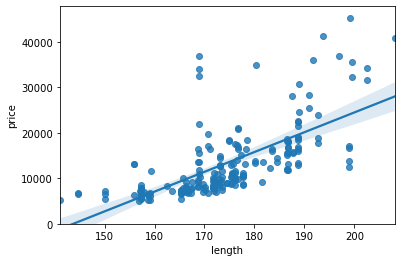

In [102]:
f= temp[["length", "price"]].corr()
sns.regplot(x="length", y="price", data=temp)
plt.ylim(0,)

(0.0, 47883.55859388041)

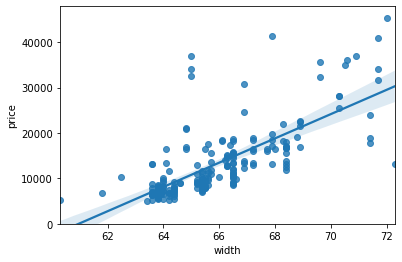

In [103]:
f= temp[["width", "price"]].corr()
sns.regplot(x="width", y="price", data=temp)
plt.ylim(0,)

(0.0, 47414.1)

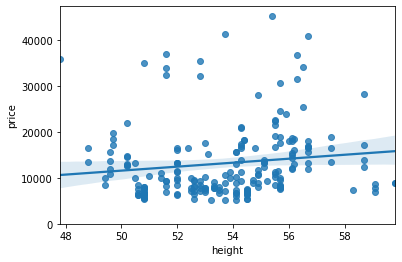

In [104]:
f= temp[["height", "price"]].corr()
sns.regplot(x="height", y="price", data=temp)
plt.ylim(0,)

***
**Through these we can see that lenght and width can be used to compare price while the height have no effect on the price as the line is almost equal to horizontal**
***

### 22. Find out the maximum city-mpg of every car and sort them in descinding order and what is the maximum city-mileage and of which car?

In [105]:
temp.groupby("make")["city-mpg"].max().sort_values(ascending= False)

make
honda            49
chevrolet        47
nissan           45
toyota           38
isuzu            38
volkswagen       37
plymouth         37
dodge            37
mitsubishi       37
mazda            36
subaru           32
peugot           28
volvo            26
audi             24
bmw              23
renault          23
mercedes-benz    22
alfa-romero      21
saab             21
porsche          19
mercury          19
jaguar           15
Name: city-mpg, dtype: int64

***
**Through this we have found out the maximum city-mpg of diffrent brands and the maximum city mileage of all the cars is of Honda.**
***

### 23.Find the bore and stroke ratio

In [108]:
temp["bore/stroke"] = (temp["bore"]/ temp["stroke"])

In [113]:
short_stroke = temp[temp["bore/stroke"].apply(lambda x: True if x > 1.1 else False)]["price"].count()

In [114]:
long_stroke = temp[temp["bore/stroke"].apply(lambda x: True if x < 1.1 else False)]["price"].count()

In [115]:
short_stroke

47

In [116]:
long_stroke

158

***
+ **An engine is an oversquare or short-stroke if its cylinders have a greater bore diameter than its stroke length, i.e. the bore to stroke ratio is greater than 1.**
+ **An engine is described as undersquare or long-stroke if its cylinders have a smaller bore (width, diameter) than its stroke (length of piston travel) - giving a ratio value of less than 1.1.**
+ **manufacturers nowadays  push for more and more efficient engines and higher fuel economy, so Undersquare engines have become more common**

***

### 24. Find the effect of bore and stroke ratio on price?

(0.0, 47414.1)

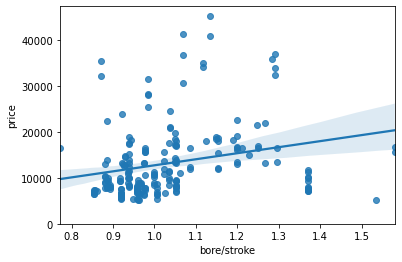

In [117]:
f= temp[["bore/stroke", "price"]].corr()
sns.regplot(x="bore/stroke", y="price", data=temp)
plt.ylim(0,)

### 25. city mileage and highway mileage on the basis of drive wheels.

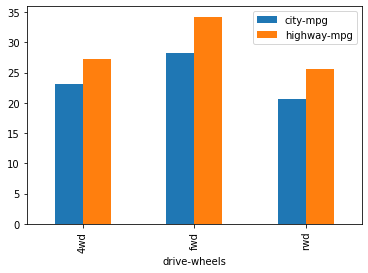

In [119]:
temp.groupby("drive-wheels")[["city-mpg","highway-mpg"]].mean().plot(kind="bar")


***
**Through this we have seen that the cars with forward wheels drive has the maximum mean average**
***

### 26.  Average mileage on the basis of fuel type

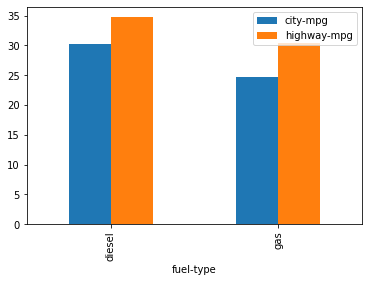

In [120]:
temp.groupby("fuel-type")[["city-mpg","highway-mpg"]].mean().plot(kind="bar")


***
**Through this we have seen that diesel cars used to have more average mileage as compared to gas cars**
***

## 27. Average mileage of diffrent aspiration

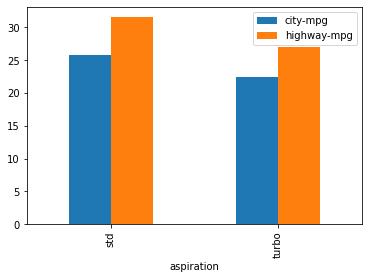

In [122]:
temp.groupby("aspiration")[["city-mpg","highway-mpg"]].mean().plot(kind="bar")


## Summary:

***

+ **We have seen how easily we can get an data analysis report using the pandas library.**
+ **With a few lines of code, we have generated an interactive report.**
+ **And we have seen that engine size, mileage , lenght , width, horsepower are the features which effects the price.**



***